# Chapter 3: 신경망
---

* 신경망은 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 있다. (인간이 직접 넣어주지 않아도 됨.)

##### 3.1 퍼셉트론에서 신경망으로

**신경망의 예**   
* 신경망은 입력층, 은닉충, 출력층으로 이루어져있으며 은닉층은 사람에게 보이지 않는다.

<img src="./img/ch3-1.png" width="300" height="250">
   
**퍼셉트론 복습**   
<img src="./img/ch3-2.png" width="600" height="300">
   
**활성화 함수의 등장**   
: 입력 신호의 총합을 출력 신호로 변환하는 함수   
$a = b + w_1x_1 + w_2x_2$   
$y = h(a)$   
<img src="./img/ch3-3.png" width="300" height="300">

##### 3.2 활성화 함수

계단함수: 퍼셉트론에서 쓰이는 활성화 함수의 일종으로 임계값을 경계로 출력이 바뀌는 활성화 함수   
$h(x) = \begin{cases} 0 (x \leq 0) \\ 1 (x > 1) \end{cases}$


**시그모이드 함수**
$h(x) = \frac {1} {1 + exp(-x)}$

In [102]:
import numpy as np
# 계단 함수 구현
def step_function(x):
    y = x > 0
    return y.astype(int)

x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print(y)
y = y.astype(int)
print(y)

[False  True  True]
[0 1 1]


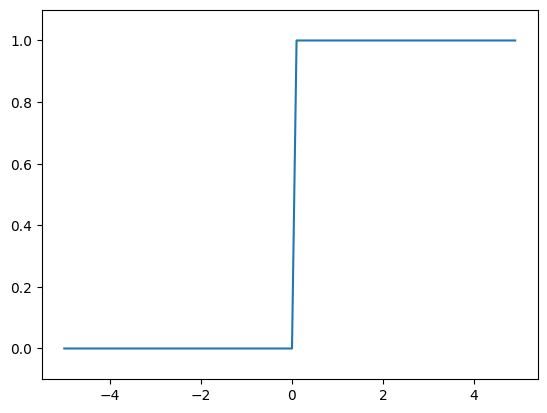

In [103]:
# 계단 함수의 그래프
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

[0.26894142 0.73105858 0.88079708]


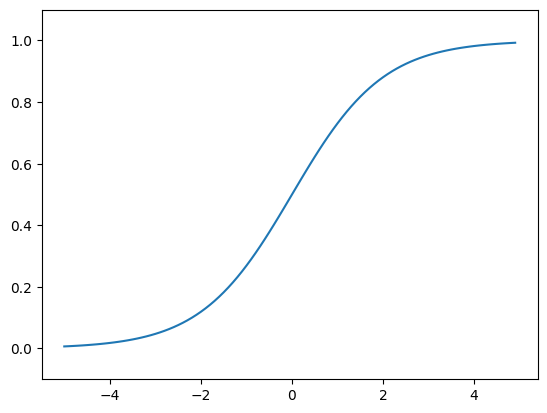

In [104]:
# 시그모이드 함수 구현
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

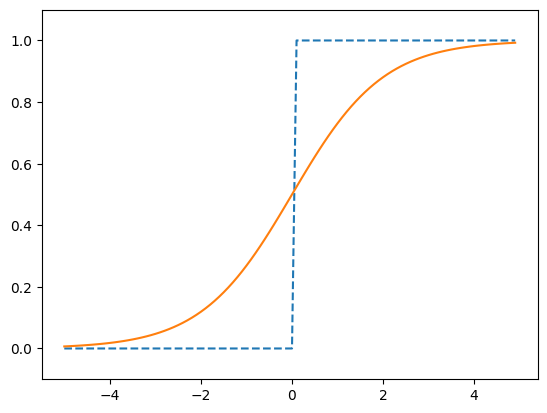

In [105]:
x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)
plt.plot(x, y1, linestyle="--")
plt.plot(x, y2)
plt.ylim(-0.1, 1.1)
plt.show()

* 차이점: 시그모이드 함수는 매끄러운(연속적인) 반면에 계단 함수는 그렇지 않다.
    * 시그모이드 함수는 실수를 출력하는 반면에 계단 함수는 0 아니면 1만 출력한다.
* 공통점: 둘 다 입력이 작을 때의 출력은 0에 가깝고(혹은 0이고) 입력이 클 때는 출력이 1에 가깝다(혹은 1이다).
    * 즉, 둘 다 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다.
    * 입력이 아무리 작거나 커도 0에서 1 사이의 값을 출력한다.
    * **비선형 함수**이다.

* 활성화 함수가 비선형 함수인 이유: 선형 함수일 때는 층을 아무리 깊게 해도 은닉층이 없는 네트워크이기 때문이다.
    * Ex) $h(x) = cx$ 일 때 3층 네트워크라면 $y(x) = h(h(h(x))) = c * c * c * x = c^3(x)$

**ReLU 함수**

$h(x) = \begin{cases} x (x > 0) \\ 0 (x \leq 0)\end{cases}$

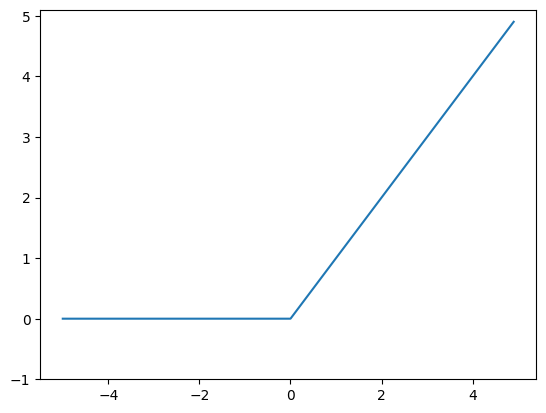

In [106]:
# ReLU 함수 구현
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.1)
plt.show()

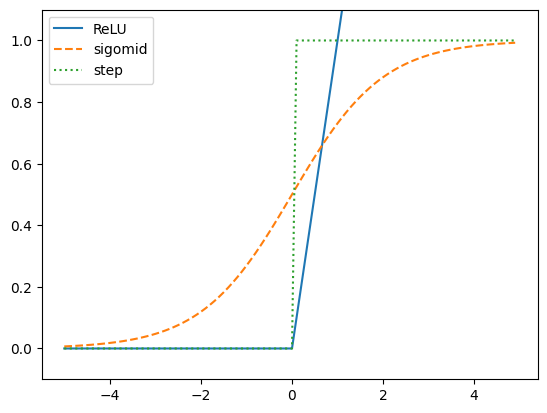

In [107]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
y1 = sigmoid(x)
y2 = step_function(x)
plt.plot(x, y, label="ReLU")
plt.plot(x, y1, linestyle='--', label="sigomid")
plt.plot(x, y2, linestyle="dotted", label="step")
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()

##### 3.3 다차원 배열의 계산


In [108]:
# 행렬의 곱
A = np.array([[1, 2], [3, 4]])
print(A.shape)
B = np.array([[5, 6], [7, 8]])
print(B.shape)
np.dot(A,B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [109]:
A = np.array([[1,2,3], [4,5,6]])
print(A.shape)
B = np.array([[1,2], [3,4], [5,6]])
print(B.shape)
np.dot(A,B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

**다차원 배열의 곱에서는 두 행렬의 대응하는 차원의 원소 수를 일치 시키는 것이 중요하다!**

In [110]:
X = np.array([1, 2])
print(X.shape)
W = np.array([[1,2,3], [4,5,6]])
print(W)
print(W.shape)
Y = np.dot(X,W)
print(Y)

(2,)
[[1 2 3]
 [4 5 6]]
(2, 3)
[ 9 12 15]


##### 3.4 3층 신경망 구현하기
   
<img src="./img/ch3-4.png" width = "700" height = "300">

In [111]:
# 코드로 나타내기
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2, 3)
(2,)
(3,)


In [112]:
# 활성화 함수 적용
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [113]:
# 1층에서 2층 전달 과정 코드로 나타내기
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape) 

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [114]:
# 2층에서 출력층으로 신호 전달

def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

In [115]:
# 구현 정리
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


##### 3.5 출력층 설계하기

신경망은 분류와 회귀 모두에 이용되지만 둘 중 어떤 문제냐에 따라 출력층에서 사용하는 활성화 함수가 달라진다.   
일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용한다.   

**소프트맥스 함수**
   
$y_k = \frac {exp(a_k)} {\sum_{i = 1}^n exp(a_i)}$

In [116]:
# 하나씩 구현
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [117]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

하지만 위 코드는 오버플로우 문제가 있다.   
지수 함수의 경우 exp(100)만 해도 0이 40개가 넘는 큰 값이 나온다. -> 함수 개선

$y_k = \frac {exp(a_k)} {\sum_{i = 1}^n exp(a_i)} = \frac {C exp(a_k)} {C \sum_{i = 1}^n exp(a_i)} = \frac {exp(a_k + log C)} {\sum_{i = 1}^n exp(a_i + log C)} = \frac {exp(a_k + C')} {\sum_{i = 1}^n exp(a_i + C')}$   
   
즉, $C'(log C)$는 오버플로우를 막는 목적

In [134]:
# EX)
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

C = np.max(a)
print(a - C)

print(np.exp(a - C) / np.sum(np.exp(a - C)))
print(np.sum(np.exp(a - C) / np.sum(np.exp(a - C))))

[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]
1.0


C:\Users\supli\AppData\Local\Temp\ipykernel_40724\3814700210.py:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
C:\Users\supli\AppData\Local\Temp\ipykernel_40724\3814700210.py:3: RuntimeWarning: invalid value encountered in divide
  print(np.exp(a) / np.sum(np.exp(a)))


In [135]:
# 개선된 소프트맥스 함수
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [133]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[9.99954600e-01 4.53978686e-05 2.06106005e-09]


1.0

**소프트맥스 함수의 특징**   

* 소프트맥스 함수 출력의 총합은 1이다. => 출력을 확률로 해석
* 소프트맥수 함수를 적용해도 각 원소의 대소 관계는 변화지 않는다.(소프트맥스 함수는 단조 증가이기 때문) => 생략 가능



##### 3.6 손글씨 숫자 인식   
* 이미 학습된 매개변수를 사용하여 학습 과정은 생략, 추론 과정(순전파)만 구현

In [121]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [122]:
# 예시 데이터 출력
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


위 코드 실행결과:   

<img src="./img/ch3-5.PNG" width="70" height="70">

In [123]:
# 신경망 추론 처리
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", "rb") as f:  # 이미 학습된 매개변수
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y
    

In [124]:
# 정확도 평가
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])  # x[i]가 0~9일 확률을 배열로 반환
    p = np.argmax(y)            # 확률이 가장 높은 원소를 얻는다.(정확히 말하자면 원소의 인덱스)   
    if p == t[i]:               # 그 원소가 정답 레이블이랑 같다면
        accuracy_cnt += 1

print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [126]:
# 신경망의 각 층의 가중치 형상 출력
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


<img src="./img/ch3-6.png" width="800" height="300">

In [127]:
# 배치 처리를 적용
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):  # 0부터 len(x)-1까지 batch_size씩
    x_batch = x[i:i+batch_size]         # (100, 784)
    y_batch = predict(network, x_batch) # (100, 10)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [132]:
# axis=1 이해
# 1번째 차원을 구성하는 각 원소에서 최대값의 인덱스를 찾도록 (차원은 0부터 시작) (쉽게 생각하면 2차원일 경우 0은 세로, 1은 가로)
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis=1)
print(y)

t = np.array([1, 2, 0, 0])
print(y == t)
print(np.sum(y==t))

[1 2 1 0]
[ True  True False  True]
3


##### 3.7 정리